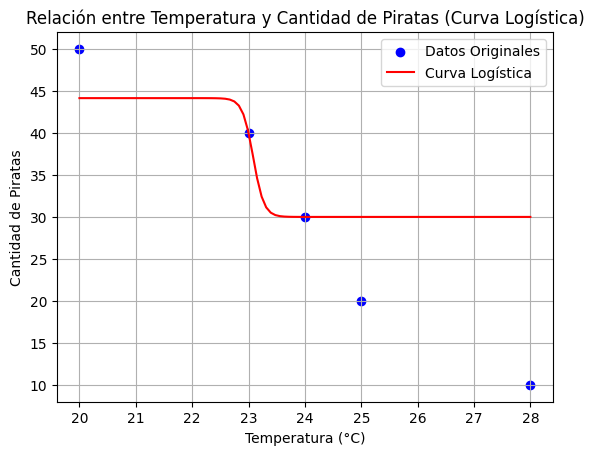

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos ficticios para ilustrar la relación entre temperatura y cantidad de piratas
temperaturas = np.array([20, 23, 24, 25, 28])  # Ejemplo de temperatura (en grados Celsius)
cantidad_piratas = np.array([50, 40, 30, 20, 10])  # Ejemplo de cantidad de piratas

# Normalizar los datos
temperaturas_norm = (temperaturas - np.mean(temperaturas)) / np.std(temperaturas)
cantidad_piratas_norm = (cantidad_piratas - np.mean(cantidad_piratas)) / np.std(cantidad_piratas)

# Definir la función logística (sigmoide)
def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

# Ajustar la curva logística a los datos normalizados
parametros, _ = curve_fit(sigmoid, temperaturas_norm, cantidad_piratas_norm, p0=[1, np.mean(temperaturas_norm)], maxfev=100)

# Generar valores de temperatura normalizados para la curva de regresión
temperaturas_prediccion_norm = np.linspace(min(temperaturas_norm), max(temperaturas_norm), 100)

# Calcular la cantidad de piratas predicha usando la función logística
cantidad_piratas_prediccion_norm = sigmoid(temperaturas_prediccion_norm, *parametros)

# Desnormalizar los datos predichos
cantidad_piratas_prediccion = cantidad_piratas_prediccion_norm * np.std(cantidad_piratas) + np.mean(cantidad_piratas)

# Graficar los datos originales y la curva de regresión logística
plt.scatter(temperaturas, cantidad_piratas, color='blue', label='Datos Originales')
plt.plot(temperaturas_prediccion_norm * np.std(temperaturas) + np.mean(temperaturas), cantidad_piratas_prediccion, color='red', label='Curva Logística')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Cantidad de Piratas')
plt.title('Relación entre Temperatura y Cantidad de Piratas (Curva Logística)')
plt.legend()
plt.grid(True)
plt.show()